<a href="https://colab.research.google.com/github/Saigirish-Suryadevara/Saigirish_INFO5731_Fall2024/blob/main/Suryadevara_Saigirish_INFO5731_Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
# Write your code here
from gensim import corpora
from gensim.models import CoherenceModel,LdaModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# downloading necessary nltk data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Sample text dataset
dataset = ["This console is spectacular! Worth every penny.",
           "The console feels premium and amazing.",
           "The controller build feels worse.",
           "The console does not perform up to the mark, yet good for the price.",
           "This console is worse! Bad in this generation of consoles.",
           "The Blackops game on this console is amazing.",
           "The palystation doesnt have any subscription like xbox which is frustrating.",
           "I would not suggest this console to anyone.",
           "If you would want to by this console, i would suggest wait till black friday sales.",
           "I’ve been seeing these handheld console things with supposedly hundred of game on them advertised all over TikTok and they look really cool, but I want to make sure that if I buy one it won’t be a hunk of junk or just a flat out scam. So if anyone knows anything about them I’d appreciate your input. Thanks.",
          "yes but i would buy it from ambernic directly it comes with games either way (and you can add more) plus you have a lower chance of getting scammed",
          "I just got an RG353v & absolutely Love it!!! Been playing RE3 for Dreamcast & it runs great! Not all N64 & Dreamcast run great, but there are workarounds!",
           "Just grabbed mine from a new customer deal on TikTok (yes I know) for £12.50. I have had one before but sold it and regretted it. These are great for work breaks and weekends away.",
           "That's the model I have for my son, I got it from Amazon with preloaded SD card full of games. No issues so far.",
           "I've heard good things about the abernics. They come in a huge variety of shapes and specs so check out the other devices they offer.",
           "They're good. I've had two. Only pet peeve us the pokemo games are glitchy. You get to a certain area and you can't proceed any further.",
           "I've had one for a few months now and I play all kinds of pokemon games including romhacks and I haven't had any issues like that. you can check out r/RG35XX for more info about them but everyone there is helpful and there are a few different CFW options available (I run Batocera). I'd try to find a RG35XX+ if you can. they support wifi and bluetooth",
           "You gotta be careful where you buy them. I was stupid and ordered one off facebook and got one of those piece of shit things with a bunch of weird knockoff NES games with weird names. Motherfuckers.",
           "i got this exact one from tik tok shop and it was amazing.",
           "I got one from temu for about 30 bucks, the SP model. I’m not unhappy with it, but it does feel a little cheap. It works and the card provided has tons of games."]

# preprocessing dataset
text_stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

text_lemmatized = []
for text in dataset:
  tokens = word_tokenize(text.lower())
  tokens = [lemmatizer.lemmatize(w) for w in tokens if w.isalpha() and w not in text_stop_words]
  text_lemmatized.append(tokens)

# initaiting dictionary & corpus
id_2_word = corpora.Dictionary(text_lemmatized)
corpus = [id_2_word.doc2bow(t) for t in text_lemmatized]

# defining fucntion to calculate coherence scores
def calculate_coherence_scores(dictionary, corpus, texts, limit, start=2, step=1):
  coherence_scores = []
  list_model = []
  for k in range(start,limit,step):
    lda_model = LdaModel(corpus= corpus, id2word= dictionary, num_topics= k, random_state=100, passes= 10 )
    list_model.append(lda_model)
    coherence_model = CoherenceModel(model= lda_model, texts= texts, dictionary= dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())
  return list_model,coherence_scores

# setting up range values and getting best model
limit = 6; start =2; step = 1
list_model, coherence_scores = calculate_coherence_scores(id_2_word, corpus, text_lemmatized, limit, start, step)


best_model = list_model[coherence_scores.index(max(coherence_scores))]
topics = best_model.print_topics(num_words= 5)
for i,topic in topics:
  print(f"Topic #{i+1}:{[topic]}")





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topic #1:['0.033*"got" + 0.028*"one" + 0.023*"game" + 0.018*"great" + 0.013*"good"']
Topic #2:['0.050*"console" + 0.024*"would" + 0.024*"game" + 0.013*"amazing" + 0.013*"buy"']


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [ ]:
!!pip install -U scikit-learn

['Requirement already satisfied: scikit-learn in /usr/local/lib/python3.10/dist-packages (1.5.2)',
 'Requirement already satisfied: numpy>=1.19.5 in /usr/local/lib/python3.10/dist-packages (from scikit-learn) (1.26.4)',
 'Requirement already satisfied: scipy>=1.6.0 in /usr/local/lib/python3.10/dist-packages (from scikit-learn) (1.13.1)',
 'Requirement already satisfied: joblib>=1.2.0 in /usr/local/lib/python3.10/dist-packages (from scikit-learn) (1.4.2)',
 'Requirement already satisfied: threadpoolctl>=3.1.0 in /usr/local/lib/python3.10/dist-packages (from scikit-learn) (3.5.0)']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from gensim import corpora
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Downloading necessary nltk data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Sample text dataset
dataset = ["This console is spectacular! Worth every penny.",
           "The console feels premium and amazing.",
           "The controller build feels worse.",
           "The console does not perform up to the mark, yet good for the price.",
           "This console is worse! Bad in this generation of consoles.",
           "The Blackops game on this console is amazing.",
           "The palystation doesnt have any subscription like xbox which is frustrating.",
           "I would not suggest this console to anyone.",
           "If you would want to by this console, i would suggest wait till black friday sales.",
           "I’ve been seeing these handheld console things with supposedly hundred of game on them advertised all over TikTok and they look really cool, but I want to make sure that if I buy one it won’t be a hunk of junk or just a flat out scam. So if anyone knows anything about them I’d appreciate your input. Thanks.",
          "yes but i would buy it from ambernic directly it comes with games either way (and you can add more) plus you have a lower chance of getting scammed",
          "I just got an RG353v & absolutely Love it!!! Been playing RE3 for Dreamcast & it runs great! Not all N64 & Dreamcast run great, but there are workarounds!",
           "Just grabbed mine from a new customer deal on TikTok (yes I know) for £12.50. I have had one before but sold it and regretted it. These are great for work breaks and weekends away.",
           "That's the model I have for my son, I got it from Amazon with preloaded SD card full of games. No issues so far.",
           "I've heard good things about the abernics. They come in a huge variety of shapes and specs so check out the other devices they offer.",
           "They're good. I've had two. Only pet peeve us the pokemo games are glitchy. You get to a certain area and you can't proceed any further.",
           "I've had one for a few months now and I play all kinds of pokemon games including romhacks and I haven't had any issues like that. you can check out r/RG35XX for more info about them but everyone there is helpful and there are a few different CFW options available (I run Batocera). I'd try to find a RG35XX+ if you can. they support wifi and bluetooth",
           "You gotta be careful where you buy them. I was stupid and ordered one off facebook and got one of those piece of shit things with a bunch of weird knockoff NES games with weird names. Motherfuckers.",
           "i got this exact one from tik tok shop and it was amazing.",
           "I got one from temu for about 30 bucks, the SP model. I’m not unhappy with it, but it does feel a little cheap. It works and the card provided has tons of games."]

# Preprocessing dataset
text_stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

text_lemmatized = []
for text in dataset:
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w.isalpha() and w not in text_stop_words]
    text_lemmatized.append(tokens)

# Rejoining tokens for vectorization
text_lemmatized_joined = [" ".join(t) for t in text_lemmatized]

# Initiating dictionary for coherence calculation
dic = corpora.Dictionary(text_lemmatized)

# Defining function to calculate coherence scores
def calculate_coherence_scores(dictionary, vectorizer, texts, limit, start=2, step=1):
    coherence_scores = []
    list_model = []

    for k in range(start, limit, step):
        # Fit the model
        matrix_tfidf = vectorizer.fit_transform(texts)
        model_lsa = TruncatedSVD(n_components=k, random_state=100)
        model_lsa.fit(matrix_tfidf)

        # Getting topics
        topics = []
        terms = vectorizer.get_feature_names_out()
        for comp in model_lsa.components_:
            topic_terms = [terms[i] for i in comp.argsort()[-5:]]  # 5 best words per topic
            topics.append(topic_terms)

        # Using coherence model for calculating coherence value
        model_coherence = CoherenceModel(topics=topics, texts=text_lemmatized, dictionary=dic, coherence='c_v')
        coherence_scores.append(model_coherence.get_coherence())
        list_model.append(model_lsa)

    return list_model, coherence_scores

# Setting range for topics and getting best models
vectorizer = TfidfVectorizer()
limit = 6
start = 2
step = 1
list_model, coherence_scores = calculate_coherence_scores(dic, vectorizer, text_lemmatized_joined, limit, start, step)

# Selecting model with highest coherence value
best_k = start + coherence_scores.index(max(coherence_scores))
best_model = list_model[coherence_scores.index(max(coherence_scores))]

# Displaying topics of the best model
print(f"Best number of topics: {best_k}")
terms = vectorizer.get_feature_names_out()
for indx, comp in enumerate(best_model.components_):
    topic_terms = [terms[i] for i in comp.argsort()[-5:]]  # Top 5 terms
    print(f"Topic #{indx + 1}: {[', '.join(topic_terms)]}")




Best number of topics: 4
Topic #1: ['suggest, feel, would, amazing, console']
Topic #2: ['model, amazing, game, one, got']
Topic #3: ['buy, one, anyone, suggest, would']
Topic #4: ['yet, price, perform, mark, good']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
# Write your code here



## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
!! pip install bertopic

['Collecting bertopic',
 '  Downloading bertopic-0.16.4-py3-none-any.whl.metadata (23 kB)',
 'Collecting hdbscan>=0.8.29 (from bertopic)',
 '  Downloading hdbscan-0.8.39-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (15 kB)',
 'Requirement already satisfied: numpy>=1.20.0 in /usr/local/lib/python3.10/dist-packages (from bertopic) (1.26.4)',
 'Requirement already satisfied: pandas>=1.1.5 in /usr/local/lib/python3.10/dist-packages (from bertopic) (2.2.2)',
 'Requirement already satisfied: plotly>=4.7.0 in /usr/local/lib/python3.10/dist-packages (from bertopic) (5.24.1)',
 'Requirement already satisfied: scikit-learn>=0.22.2.post1 in /usr/local/lib/python3.10/dist-packages (from bertopic) (1.5.2)',
 'Requirement already satisfied: sentence-transformers>=0.4.1 in /usr/local/lib/python3.10/dist-packages (from bertopic) (3.2.1)',
 'Requirement already satisfied: tqdm>=4.41.1 in /usr/local/lib/python3.10/dist-packages (from bertopic) (4.66.6)',
 'Collecting umap-learn>=0

In [ ]:
# Write your code here
from bertopic import BERTopic
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
from umap import UMAP
import nltk

# downloading necessary nltk data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Sample text dataset
dataset = ["This console is spectacular! Worth every penny.",
           "The console feels premium and amazing.",
           "The controller build feels worse.",
           "The console does not perform up to the mark, yet good for the price.",
           "This console is worse! Bad in this generation of consoles.",
           "The Blackops game on this console is amazing.",
           "The palystation doesnt have any subscription like xbox which is frustrating.",
           "I would not suggest this console to anyone.",
           "If you would want to by this console, i would suggest wait till black friday sales.",
           "I’ve been seeing these handheld console things with supposedly hundred of game on them advertised all over TikTok and they look really cool, but I want to make sure that if I buy one it won’t be a hunk of junk or just a flat out scam. So if anyone knows anything about them I’d appreciate your input. Thanks.",
          "yes but i would buy it from ambernic directly it comes with games either way (and you can add more) plus you have a lower chance of getting scammed",
          "I just got an RG353v & absolutely Love it!!! Been playing RE3 for Dreamcast & it runs great! Not all N64 & Dreamcast run great, but there are workarounds!",
           "Just grabbed mine from a new customer deal on TikTok (yes I know) for £12.50. I have had one before but sold it and regretted it. These are great for work breaks and weekends away.",
           "That's the model I have for my son, I got it from Amazon with preloaded SD card full of games. No issues so far.",
           "I've heard good things about the abernics. They come in a huge variety of shapes and specs so check out the other devices they offer.",
           "They're good. I've had two. Only pet peeve us the pokemo games are glitchy. You get to a certain area and you can't proceed any further.",
           "I've had one for a few months now and I play all kinds of pokemon games including romhacks and I haven't had any issues like that. you can check out r/RG35XX for more info about them but everyone there is helpful and there are a few different CFW options available (I run Batocera). I'd try to find a RG35XX+ if you can. they support wifi and bluetooth",
           "You gotta be careful where you buy them. I was stupid and ordered one off facebook and got one of those piece of shit things with a bunch of weird knockoff NES games with weird names. Motherfuckers.",
           "i got this exact one from tik tok shop and it was amazing.",
           "I got one from temu for about 30 bucks, the SP model. I’m not unhappy with it, but it does feel a little cheap. It works and the card provided has tons of games."]

# preprocessing dataset
text_stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

text_lemmatized = []
for text in dataset:
  tokens = word_tokenize(text.lower())
  tokens = [lemmatizer.lemmatize(w) for w in tokens if w.isalpha() and w not in text_stop_words]
  text_lemmatized.append(" ".join(tokens))

# BERTopic model
model_topic = BERTopic()
topics, _ = model_topic.fit_transform(text_lemmatized)

for num_topic in set(topics):
  print(f"Topic #{num_topic}: {model_topic.get_topic(num_topic)}")









[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topic #-1: [('console', 0.13240216743619174), ('game', 0.1218146940827129), ('one', 0.11069672308628466), ('got', 0.09896660536484266), ('would', 0.0731882125588209), ('feel', 0.05875308385625466), ('good', 0.05875308385625466), ('run', 0.05875308385625466), ('buy', 0.05875308385625466), ('thing', 0.05875308385625466)]


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [ ]:
!! pip install pyLDAvis

['Collecting pyLDAvis',
 '  Downloading pyLDAvis-3.4.1-py3-none-any.whl.metadata (4.2 kB)',
 'Requirement already satisfied: numpy>=1.24.2 in /usr/local/lib/python3.10/dist-packages (from pyLDAvis) (1.26.4)',
 'Requirement already satisfied: scipy in /usr/local/lib/python3.10/dist-packages (from pyLDAvis) (1.13.1)',
 'Requirement already satisfied: pandas>=2.0.0 in /usr/local/lib/python3.10/dist-packages (from pyLDAvis) (2.2.2)',
 'Requirement already satisfied: joblib>=1.2.0 in /usr/local/lib/python3.10/dist-packages (from pyLDAvis) (1.4.2)',
 'Requirement already satisfied: jinja2 in /usr/local/lib/python3.10/dist-packages (from pyLDAvis) (3.1.4)',
 'Requirement already satisfied: numexpr in /usr/local/lib/python3.10/dist-packages (from pyLDAvis) (2.10.1)',
 'Collecting funcy (from pyLDAvis)',
 '  Downloading funcy-2.0-py2.py3-none-any.whl.metadata (5.9 kB)',
 'Requirement already satisfied: scikit-learn>=1.0.0 in /usr/local/lib/python3.10/dist-packages (from pyLDAvis) (1.5.2)',
 'Re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topic #1:['0.033*"got" + 0.028*"one" + 0.023*"game" + 0.018*"great" + 0.013*"good"']
Topic #2:['0.050*"console" + 0.024*"would" + 0.024*"game" + 0.013*"amazing" + 0.013*"buy"']


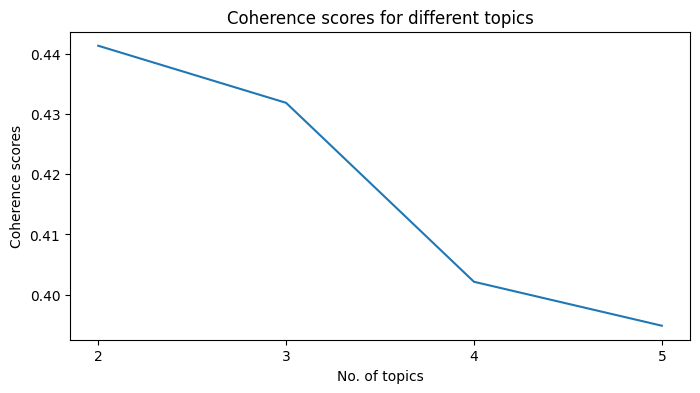

In [ ]:
import matplotlib.pyplot as plt
import pyLDAvis.gensim_models
import pyLDAvis

# downloading necessary nltk data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Sample text dataset
dataset = ["This console is spectacular! Worth every penny.",
           "The console feels premium and amazing.",
           "The controller build feels worse.",
           "The console does not perform up to the mark, yet good for the price.",
           "This console is worse! Bad in this generation of consoles.",
           "The Blackops game on this console is amazing.",
           "The palystation doesnt have any subscription like xbox which is frustrating.",
           "I would not suggest this console to anyone.",
           "If you would want to by this console, i would suggest wait till black friday sales.",
           "I’ve been seeing these handheld console things with supposedly hundred of game on them advertised all over TikTok and they look really cool, but I want to make sure that if I buy one it won’t be a hunk of junk or just a flat out scam. So if anyone knows anything about them I’d appreciate your input. Thanks.",
          "yes but i would buy it from ambernic directly it comes with games either way (and you can add more) plus you have a lower chance of getting scammed",
          "I just got an RG353v & absolutely Love it!!! Been playing RE3 for Dreamcast & it runs great! Not all N64 & Dreamcast run great, but there are workarounds!",
           "Just grabbed mine from a new customer deal on TikTok (yes I know) for £12.50. I have had one before but sold it and regretted it. These are great for work breaks and weekends away.",
           "That's the model I have for my son, I got it from Amazon with preloaded SD card full of games. No issues so far.",
           "I've heard good things about the abernics. They come in a huge variety of shapes and specs so check out the other devices they offer.",
           "They're good. I've had two. Only pet peeve us the pokemo games are glitchy. You get to a certain area and you can't proceed any further.",
           "I've had one for a few months now and I play all kinds of pokemon games including romhacks and I haven't had any issues like that. you can check out r/RG35XX for more info about them but everyone there is helpful and there are a few different CFW options available (I run Batocera). I'd try to find a RG35XX+ if you can. they support wifi and bluetooth",
           "You gotta be careful where you buy them. I was stupid and ordered one off facebook and got one of those piece of shit things with a bunch of weird knockoff NES games with weird names. Motherfuckers.",
           "i got this exact one from tik tok shop and it was amazing.",
           "I got one from temu for about 30 bucks, the SP model. I’m not unhappy with it, but it does feel a little cheap. It works and the card provided has tons of games."]

# preprocessing dataset
text_stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

text_lemmatized = []
for text in dataset:
  tokens = word_tokenize(text.lower())
  tokens = [lemmatizer.lemmatize(w) for w in tokens if w.isalpha() and w not in text_stop_words]
  text_lemmatized.append(tokens)

# initaiting dictionary & corpus
id_2_word = corpora.Dictionary(text_lemmatized)
corpus = [id_2_word.doc2bow(t) for t in text_lemmatized]

# defining fucntion to calculate coherence scores
def calculate_coherence_scores(dictionary, corpus, texts, limit, start=2, step=1):
  coherence_scores = []
  list_model = []
  for k in range(start,limit,step):
    lda_model = LdaModel(corpus= corpus, id2word= dictionary, num_topics= k, random_state=100, passes= 10 )
    list_model.append(lda_model)
    coherence_model = CoherenceModel(model= lda_model, texts= texts, dictionary= dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())
  return list_model,coherence_scores

# setting up range values and getting best model
limit = 6; start =2; step = 1
list_model, coherence_scores = calculate_coherence_scores(id_2_word, corpus, text_lemmatized, limit, start, step)


best_model = list_model[coherence_scores.index(max(coherence_scores))]
topics = best_model.print_topics(num_words= 5)
for i,topic in topics:
  print(f"Topic #{i+1}:{[topic]}")

#Coherence scores line plot
plt.figure(figsize=(8,4))
plt.plot(range(start,limit,step), coherence_scores)
plt.title("Coherence scores for different topics")
plt.xlabel("No. of topics")
plt.ylabel("Coherence scores")
plt.xticks(range(start,limit,step))
plt.show()

This horizontal bar chart displays the most significant words for each topic generated by the LDA model.
Each topic has a unique set of relevant words, and this visualization allows you to quickly see which words dominate each topic,
aiding in understanding the content of each topic.

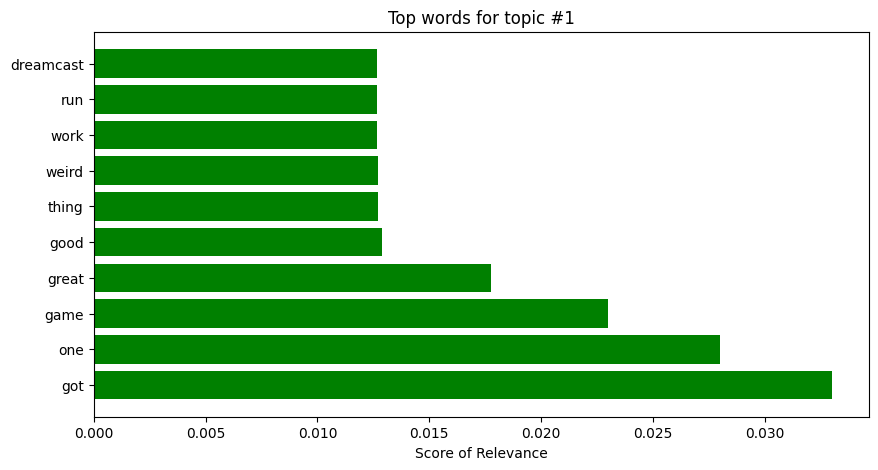

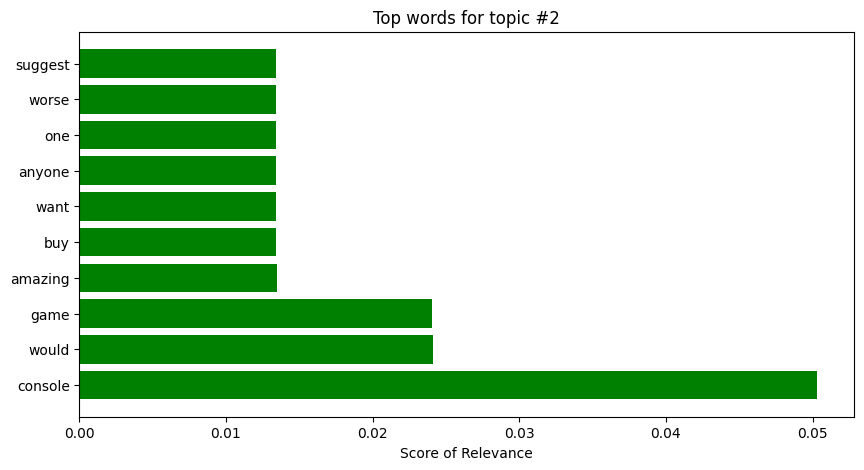

In [ ]:
#Top words for each topic bar graph
num_topics = len(topics)
for i in range(num_topics):
  word =[w for w, _ in best_model.show_topic(i)]
  score = [s for _, s in best_model.show_topic(i)]

  plt.figure(figsize= (10,5))
  plt.barh(word,score, color = "green")
  plt.xlabel("Score of Relevance")
  plt.title(f"Top words for topic #{i+1}")
  plt.show()



This is a horizontal bar chart showing the most word xbest LDA on that topic for each topic separately one by one. Focused on this topic with a lot of other important words so it can be said that this graph helps you solve the problem – what else is included in this topic.

In [ ]:
#pyLDAvis Visualisation
pyLDAvis.enable_notebook
graph = pyLDAvis.gensim_models.prepare(best_model, corpus, id_2_word)
pyLDAvis.display(graph)

This interactive one adds yet another level of emphasis on the topics, and their distributions and how these topics are related to each other. It shows the packing of topics which assists in determining topical relations. Circles focus on the most relevant characteristics to those themes and therefore improve the topic model in exploring its results.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
# Write your code here


# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

Putting text data into practice was exciting as well as topic modeling algorithms, more specifically LDA.
That was useful when I was learning how to do feature extraction in text. Of course, I encountered some issues, mostly related to data cleansing or finding
the optimal parameters. This exercise is highly applicable to NLP since it demonstrates how we can work with the text, and identify meaningful patterns.
In general, I acquired hands-on experience which will be most useful at the time of execution of any data related tasks in the future!





'''